In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
slices_list = [[148, 212], [160, 242],[214, 318],[183, 262],[170, 260],[188, 244],
               [217, 301],[166, 264],[246, 339],[174, 255],[177, 251],[153, 239],
               [230, 308],[168, 235],[214, 293],[176, 258],[254, 303],[132, 222],[174, 249],[171, 244]]

In [3]:
lung_dirs = 'D:/DATA/VESSEL_DATA/lung_CT_numpy'
mask_dirs = 'D:/DATA/VESSEL_DATA/lung_masks_numpy'

In [4]:
def make_lung_partitions(lung_dirs, mask_dirs, slices_list):
    lower_lung = []
    middle_lung = []
    upper_lung = []
    for idx in range(len(slices_list)):
        path_lung = os.path.join(lung_dirs, os.listdir(lung_dirs)[idx])
        path_mask = os.path.join(mask_dirs, os.listdir(mask_dirs)[idx])
        lung_npy = np.load(path_lung)
        mask_npy = np.load(path_mask)
        for i in range(slices_list[idx][0]):
            lower_lung.append([lung_npy[i, :, :], mask_npy[i, :, :]])
        for j in range(slices_list[idx][0], slices_list[idx][1]):
            middle_lung.append([lung_npy[j, :, :], mask_npy[j, :, :]])
        for k in range(slices_list[idx][1], lung_npy.shape[0]):
            upper_lung.append([lung_npy[k, :, :], mask_npy[k, :, :]])
    return lower_lung, middle_lung, upper_lung

In [ ]:
def make_lung_partitions(lung_dirs, mask_dirs, slices_list):
    lower_lung = []
    middle_lung = []
    for idx in range(len(slices_list)):
        path_lung = os.path.join(lung_dirs, os.listdir(lung_dirs)[idx])
        path_mask = os.path.join(mask_dirs, os.listdir(mask_dirs)[idx])
        lung_npy = np.load(path_lung)
        mask_npy = np.load(path_mask)
        for i in range(slices_list[idx][0]):
            lower_lung.append([lung_npy[i, :, :], mask_npy[i, :, :]])
        for j in range(slices_list[idx][0], slices_list[idx][1]):
            middle_lung.append([lung_npy[j, :, :], mask_npy[j, :, :]])
            
    return lower_lung, middle_lung

In [5]:
lower_lung, middle_lung, upper_lung = make_lung_partitions(lung_dirs, mask_dirs, slices_list)

In [12]:
upper_lung[0][0].shape

(512, 512)

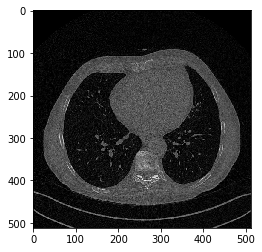

In [6]:
plt.imshow(middle_lung[0][0], cmap = 'gray')

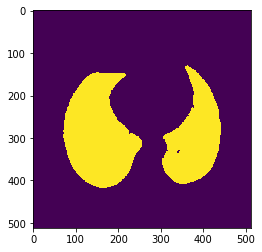

In [7]:
plt.imshow(middle_lung[0][1])

In [8]:
saved = True
if not saved:
    np.save('D:/DATA/VESSEL_DATA/lower_lung.npy', np.array(lower_lung))
    np.save('D:/DATA/VESSEL_DATA/middle_lung.npy', np.array(middle_lung))
    np.save('D:/DATA/VESSEL_DATA/upper_lung.npy', np.array(upper_lung))

In [9]:
one_hot = np.eye(3)
classifier_pairs = [[i[0], one_hot[0]] for i in lower_lung] + [[j[0], one_hot[1]] for j in middle_lung] + [[k[0], one_hot[2]] for k in upper_lung]

In [10]:
if not saved:
    np.save('D:/DATA/VESSEL_DATA/classifier_pairs.npy', np.array(classifier_pairs))